In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_trainset = pd.read_csv('./data/train.csv')
raw_testset = pd.read_csv('./data/test.csv')

In [6]:
raw_trainset.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


In [7]:
raw_testset.head()

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180


# Exploring Data

## Phân bố dữ liệu 

In [8]:
# Categorical to numerical data
map_data =  {
            'sex': 
              {
                'male'  : 0 ,
                'female' : 1
              } ,
            'smoker': 
              {
                'no': 0, 
                'yes' : 1
              },
            'region':
              {
                'northwest':0, 
                'northeast':1,
                'southeast':2,
                'southwest':3}
               }
numerical_trainset = raw_trainset.copy()
numerical_trainset.replace(map_data, inplace=True)

numerical_testset = raw_testset.copy()
numerical_testset.replace(map_data, inplace=True)

## Age distribution

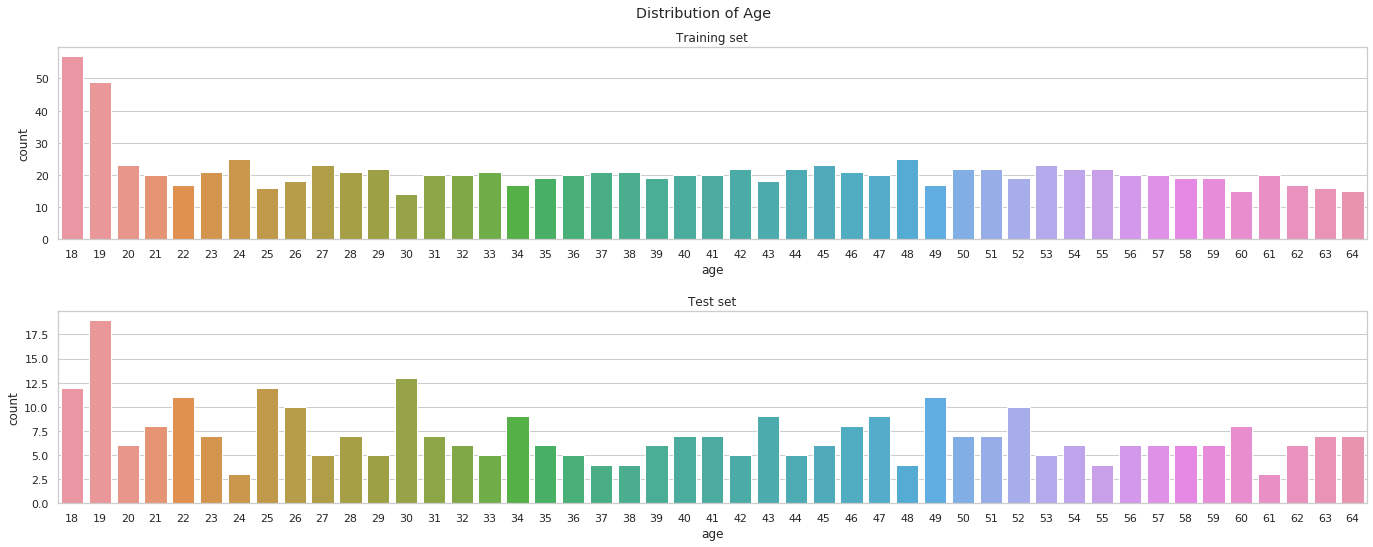

In [101]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=4.0)
fig.suptitle('Distribution of Age')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.countplot(ax = axes[0], x="age", data=raw_trainset)
sns.countplot(ax = axes[1], x="age", data=raw_testset)
plt.show()

__Nhận xét:__ Dữ liệu độ tuổi của các đối tượng được phân bố khá đều, trừ các đối tượng có tuổi < 20 có số lượng cao hơn các nhóm còn lại.

## Sex Distribution

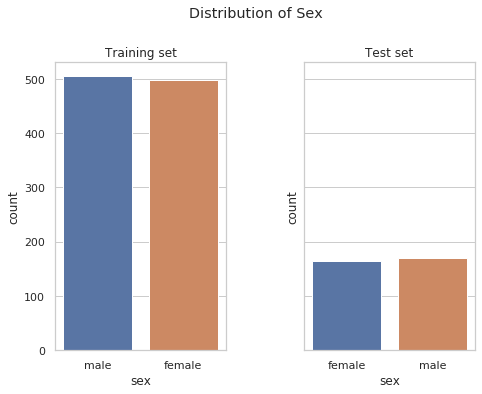

In [113]:
fig, axes = plt.subplots(1, 2, figsize = (8,6), sharey = True)

fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of Sex')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.countplot(ax = axes[0], x="sex", data=raw_trainset)
sns.countplot(ax = axes[1], x="sex", data=raw_testset)
plt.show()

__Nhận xét:__ Phân bố giớ tính khá đều nhau.

## BMI Distribution

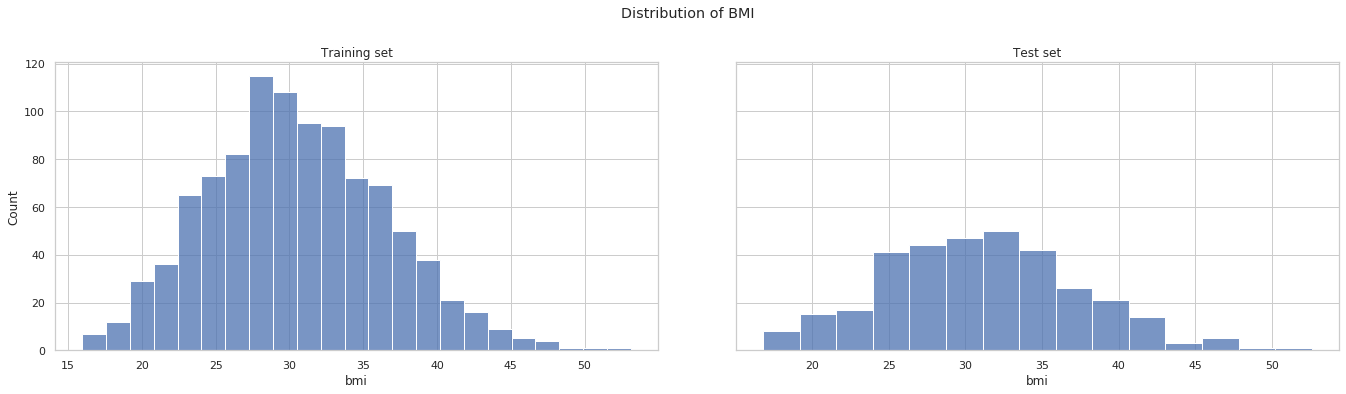

In [117]:
fig, axes = plt.subplots(1, 2, figsize = (20,6), sharey = True)
fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of BMI')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.histplot(ax = axes[0], x="bmi", data=raw_trainset)
sns.histplot(ax = axes[1], x="bmi", data=raw_testset)
plt.show()

__Nhận xét:__ Phân bố BMI có dạng tháp chuông (Có xu hường hơi lệch về phía bên trái).

## Region Distribution

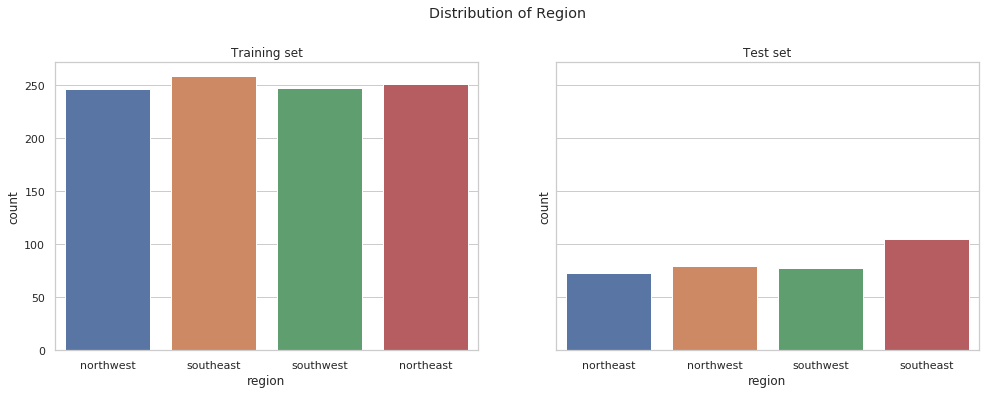

In [119]:
fig, axes = plt.subplots(1, 2, figsize = (15,6), sharey = True)
fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of Region')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.countplot(ax = axes[0], x="region", data=raw_trainset)
sns.countplot(ax = axes[1], x="region", data=raw_testset)
plt.show()

__Nhận xét:__ Phân bố vùng miền của các đối tượng khá đều nhau.

## Children Distribution

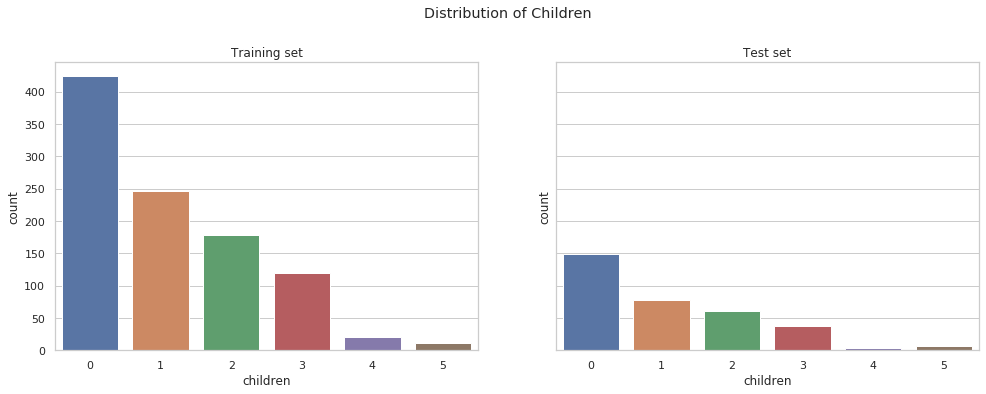

In [121]:
fig, axes = plt.subplots(1, 2, figsize = (15,6), sharey = True)
fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of Children')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.countplot(ax = axes[0], x="children", data=raw_trainset)
sns.countplot(ax = axes[1], x="children", data=raw_testset)
plt.show()

__Nhận xét:__ Phân bố số  lượng con (phụ thuộc) vào đối tượng có xu hướng giảm dần khi số lượng con tăng. Hầu hết các đối tượng có số lượng con <= 3

## Smoker Distribution

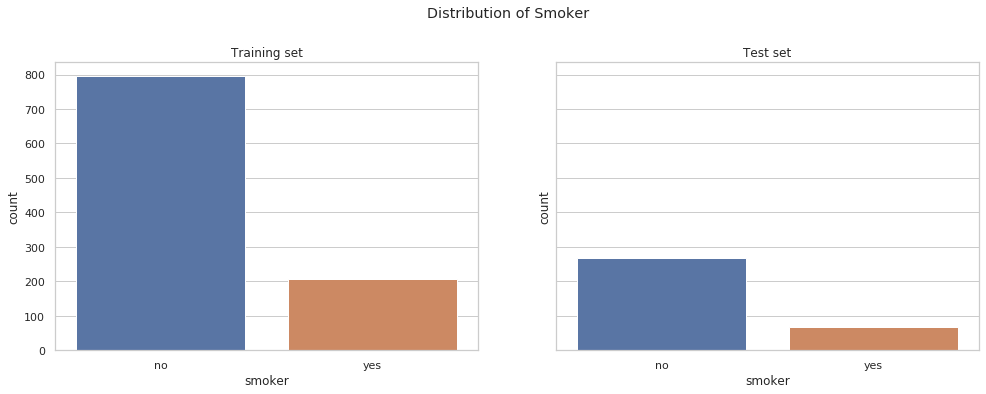

In [122]:
fig, axes = plt.subplots(1, 2, figsize = (15,6), sharey = True)
fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of Smoker')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.countplot(ax = axes[0], x="smoker", data=raw_trainset)
sns.countplot(ax = axes[1], x="smoker", data=raw_testset)
plt.show()

__Nhận xét:__ Số lượng đối tượng không hút thuốc đông hơn rất nhiều so với số lượng đối tượng hút thuốc

## Charges Distribution

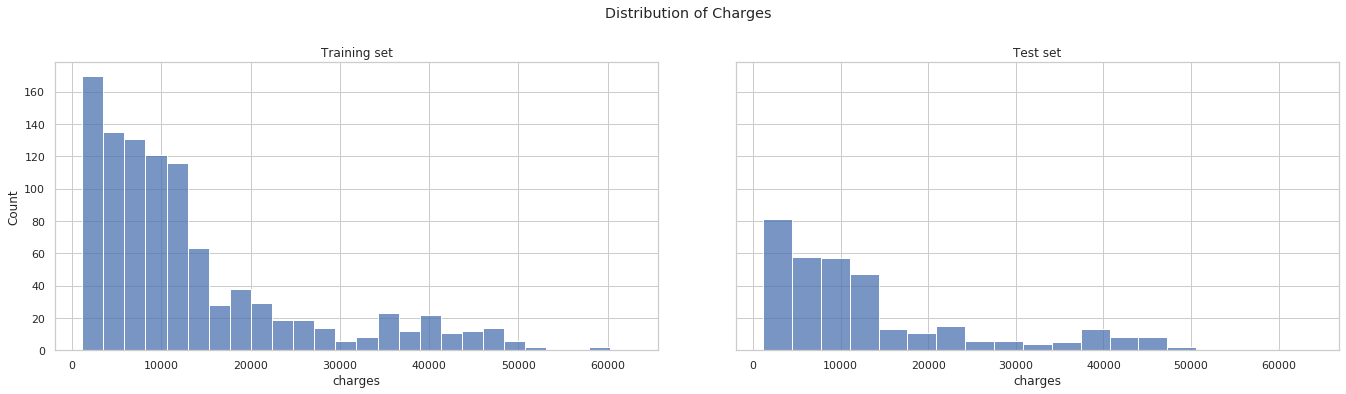

In [123]:
fig, axes = plt.subplots(1, 2, figsize = (20,6), sharey = True)
fig.tight_layout(pad = 5.0)
fig.suptitle('Distribution of Charges')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.histplot(ax = axes[0], x="charges", data=raw_trainset)
sns.histplot(ax = axes[1], x="charges", data=raw_testset)
plt.show()

__Nhận xét:__ Hầu hết các đối tượng đều có chi phí y tế < 15000. Tuy nhiên ta không thể xem phần còn lại là ngoại lệ vì chúng có thể bị ảnh hưởng bởi độ lệch của các thuộc tính trước đó như: Smoker và Children

## Corralation Matrix

In [ ]:
# Categorical to numerical data
map_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
numerical_data = raw_trainset.copy()
numerical_data.replace(map_data, inplace=True)

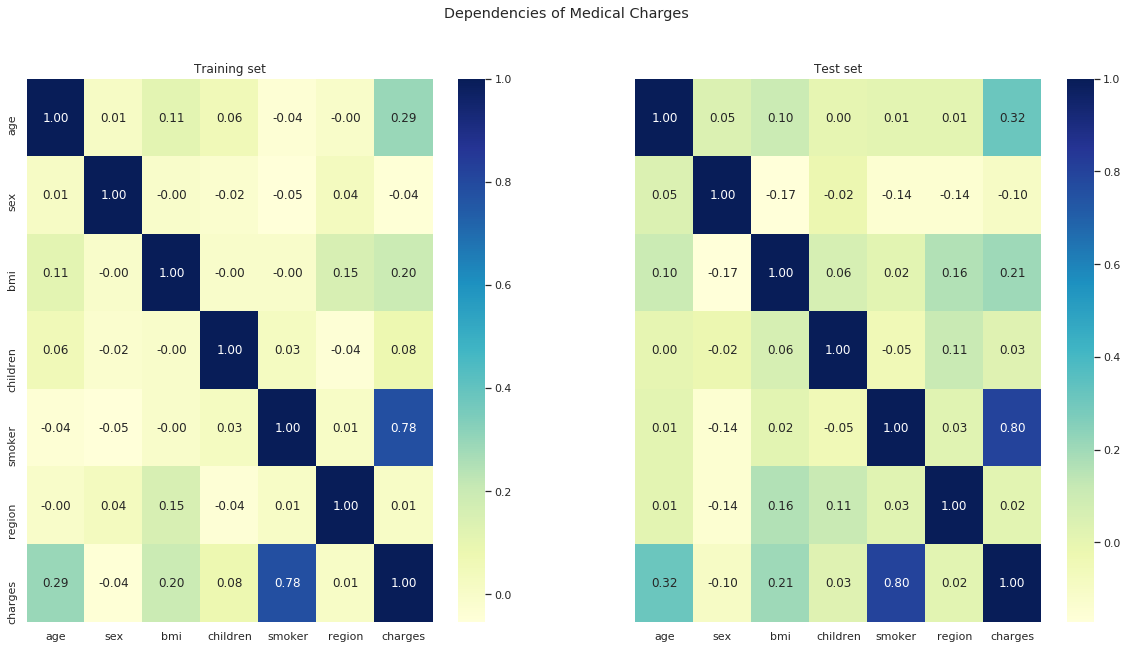

In [127]:
corr_train = numerical_trainset.corr()
corr_test  = numerical_testset.corr()
fig, axes = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle("Dependencies of Medical Charges")
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.heatmap(corr_train, cmap="YlGnBu", annot=True,fmt=".2f", ax = axes[0])
sns.heatmap(corr_test, cmap="YlGnBu", annot=True,fmt=".2f", ax = axes[1])
plt.show()

__Nhận xét:__  
- Các thuộc tính có tương quan cao với thuộc tính "charges": "Age", "BMI" và đặc biệt là "Smoker" (0.78)
- Các thuộc tính còn lại rất ít tương quan với "Charges": "Sex", "Children", "Region".

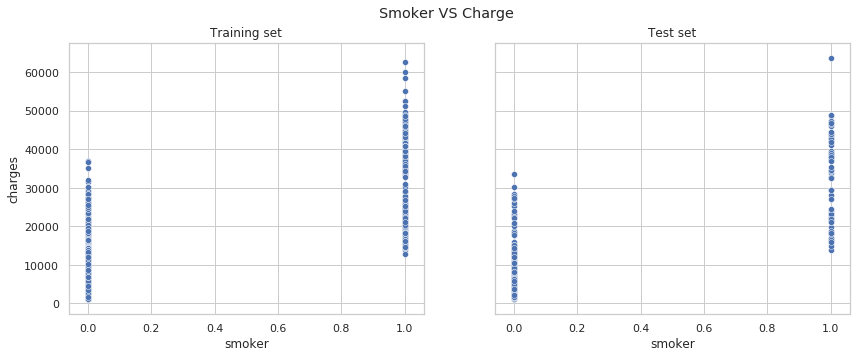

In [129]:
fig, axes = plt.subplots(1, 2, figsize= (14, 5), sharey = True)
fig.suptitle('Smoker VS Charge')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.scatterplot(ax = axes[0], x='smoker',y='charges',data=numerical_trainset)
sns.scatterplot(ax = axes[1], x='smoker',y='charges',data=numerical_testset)
plt.show()

__Nhận xét:__ Các đối tượng hút thuốc có xu hướng phải trả chi phí cao hơn những đối tượng không hút thuốc. Trong đó các đối tượng có chi phí lớn hơn 10000 và nhỏ hơn 40000 vừa có khả năng là hút hoặc không hút thuốc

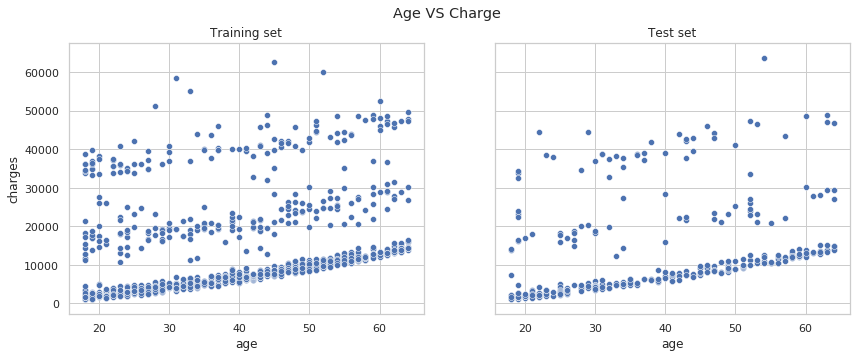

In [130]:
fig, axes = plt.subplots(1, 2, figsize= (14, 5), sharey = True)
fig.suptitle('Age VS Charge')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.scatterplot(ax = axes[0], x='age',y='charges',data=numerical_trainset)
sns.scatterplot(ax = axes[1], x='age',y='charges',data=numerical_testset)
plt.show()

__Nhận xét:__ Có thể thấy độ tuổi càng cao thì chi phí trả có xu hướng tăng theo. Ngoài ra có thể thấy độ thì chia làm 3 nhóm tăng khác nhau và có hệ số tăng khá tương đồng.

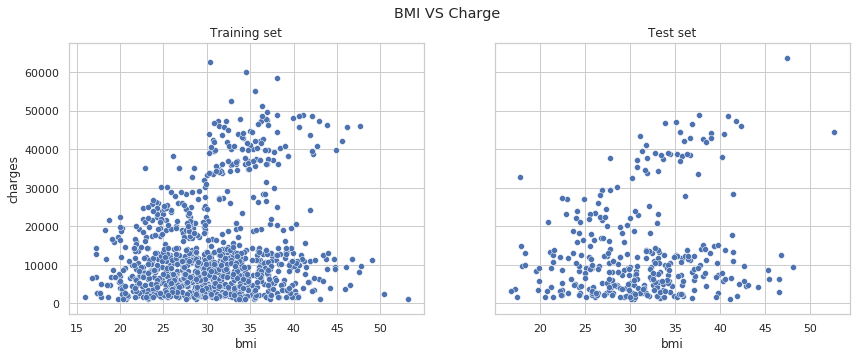

In [131]:
fig, axes = plt.subplots(1, 2, figsize= (14, 5), sharey = True)
fig.suptitle('BMI VS Charge')
axes[0].set_title('Training set')
axes[1].set_title('Test set')
sns.scatterplot(ax = axes[0], x='bmi',y='charges',data=numerical_trainset)
sns.scatterplot(ax = axes[1], x='bmi',y='charges',data=numerical_testset)
plt.show()

__Nhận xét:__ Có xu hướng tăng nhưng không rõ ràng. hồi hết các đối tượng vẫn có chi phí y tế nhỏ hơn 20000

# Data preparation

## One-hot encoding

In [10]:
# One-hot encode categorical features
trainset = pd.get_dummies(raw_trainset)
testset = pd.get_dummies(raw_testset)
trainset.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,24,23.655,0,2352.96845,0,1,1,0,0,1,0,0
1,28,26.510,2,4340.44090,1,0,1,0,0,0,1,0
2,51,39.700,1,9391.34600,0,1,1,0,0,0,0,1
3,47,36.080,1,42211.13820,0,1,0,1,0,0,1,0
4,46,28.900,2,8823.27900,1,0,1,0,0,0,0,1


## Features and Targets Separation

In [11]:
targets_trainset = np.array(trainset.charges)

features_trainset = np.array(trainset.drop('charges', axis = 1))

targets_testset = np.array(testset.charges)

features_testset = np.array(testset.drop('charges', axis = 1))

## Hàm kiểm định

In [ ]:
from sklearn import metrics

def evaluate(model, features_testset, targets_testset):
    targets_pred = model.predict(features_testset)

    MAE = metrics.mean_absolute_error(targets_testset, targets_pred)
    MSE = metrics.mean_squared_error(targets_testset, targets_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(targets_testset, targets_pred))
    R2_SCORE = r2_score(targets_testset, targets_pred)
    errors = abs(targets_pred - targets_testset)
    MAPE = errors / targets_testset
    accuracy = 1.0 - np.mean(MAPE)
    print('Mean Absolute Error: {0:.3f}'.format(MAE))
    print('Mean Squared Error: {0:.3f}'.format(MSE))
    print('Root Mean Squared Error: {0:.3f}'.format(RMSE))
    print('R2 score : {0:.3f}'.format(R2_SCORE))    
    print('Accuracy: {0:.5f}'.format(accuracy))

    return [MAE, RMSE], accuracy

# Linear Regression

### Training

In [59]:
%%time
lr = LinearRegression()
lr.fit(features_trainset, targets_trainset)

CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 2.33 ms


LinearRegression()

### Kiểm thử trên tập test

In [60]:
lr_error, lr_acc = evaluate(lr, features_testset, targets_testset)

Mean Absolute Error: 4243.654
Mean Squared Error: 35117755.736
Root Mean Squared Error: 5926.024
R2 score : 0.767
Accuracy: 0.55532


# Random Forest Regression  

## Lựa chọn các siêu tham số

### Tìm kiểm ngẫu nhiên 100 bộ tham số và kiểm định với 3 fold

In [12]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features_trainset, targets_trainset)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 2.57 s, sys: 99.6 ms, total: 2.67 s
Wall time: 2min 57s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

### Kết quả ngẫu nhiên tốt nhất

In [13]:
rf_random.best_score_, rf_random.best_estimator_, rf_random.best_params_

(0.8469278499421969,
 RandomForestRegressor(max_depth=40, min_samples_leaf=4, n_estimators=600),
 {'n_estimators': 600,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': 40,
  'bootstrap': True})

### Vét cạn lân cận bộ siêu tham số trên để đươc bộ tham số tốt hơn

In [14]:
%%time
# Number of trees in random forest
n_estimators = [600, 800, 1000]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [30, 40, 50, 60]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 8, 12]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_grid_search.fit(features_trainset, targets_trainset)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
CPU times: user 3.09 s, sys: 140 ms, total: 3.23 s
Wall time: 3min 22s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [30, 40, 50, 60, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [600, 800, 1000]},
             verbose=2)

### Kết quả vét cạn

In [15]:
rf_grid_search.best_score_, rf_grid_search.best_estimator_, rf_grid_search.best_params_

(0.8520438111701806,
 RandomForestRegressor(min_samples_leaf=12, min_samples_split=5,
                       n_estimators=600),
 {'bootstrap': True,
  'max_depth': None,
  'max_features': 'auto',
  'min_samples_leaf': 12,
  'min_samples_split': 5,
  'n_estimators': 600})

### Kiểm thử trên tập test

In [18]:
best_rf = rf_grid_search.best_estimator_
rf_error, rf_acc = evaluate(best_rf, features_testset, targets_testset)

Mean Absolute Error: 2592.958
Mean Squared Error: 20547734.667
Root Mean Squared Error: 4532.961
R2 score : 0.864
Accuracy: 0.72440


# Gradient Boost Regressor

## Lựa chọn các siêu tham số

### Tìm kiểm ngẫu nhiên 100 bộ siêu tham số và kiểm định với 3 fold

In [32]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# learning rate
learning_rate = [0.01, 0.05, 0.1]
# Create the random grid
random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
gb_random.fit(features_trainset, targets_trainset)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 2.81 s, sys: 371 ms, total: 3.18 s
Wall time: 7min 10s


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1000, 2000, 3000, 4000,
                                                         5000]},
                   random_state=42, verbose=2)

### Kết quả ngẫu nhiên tốt nhất

In [33]:
gb_random.best_score_, gb_random.best_estimator_, gb_random.best_params_

(0.8210050655194004,
 GradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_features='sqrt',
                           n_estimators=1000),
 {'n_estimators': 1000,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 10,
  'learning_rate': 0.01})

### Vét cạn lân cận bộ siêu tham số trên để đươc bộ tham số tốt hơn

In [40]:
%%time
# Number of trees in random forest
n_estimators = [3000, 5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [60, 80, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# learning rate
learning_rate = [0.01]
# Create the random grid
params = {'learning_rate': learning_rate,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_grid_search = GridSearchCV(estimator = gb, param_grid = params, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
gb_grid_search.fit(features_trainset, targets_trainset)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
CPU times: user 7.28 s, sys: 388 ms, total: 7.67 s
Wall time: 6min 8s


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01],
                         'max_depth': [60, 80, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [3000, 5000]},
             verbose=2)

### Kết quả vét cạn

In [41]:
gb_grid_search.best_score_, gb_grid_search.best_estimator_, gb_grid_search.best_params_

(0.8248347229204485,
 GradientBoostingRegressor(learning_rate=0.01, max_depth=60, max_features='sqrt',
                           n_estimators=5000),
 {'learning_rate': 0.01,
  'max_depth': 60,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 5000})

### Kiểm thử trên tập test

In [42]:
best_gb = gb_grid_search.best_estimator_
gb_error, gb_acc = evaluate(best_gb, features_testset, targets_testset)

Mean Absolute Error: 2545.602
Mean Squared Error: 23337424.402
Root Mean Squared Error: 4830.882
R2 score : 0.845
Accuracy: 0.72011


# Thực hiện hồi quy với các thuộc tính "quan trọng"

## Xếp hạng độ quan trọng trên cây GB

In [43]:
feature_list = list(trainset)

# Get numerical feature importances
importances = list(best_gb.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: smoker_no            Importance: 0.33
Variable: sex_male             Importance: 0.29
Variable: bmi                  Importance: 0.18
Variable: age                  Importance: 0.15
Variable: children             Importance: 0.02
Variable: charges              Importance: 0.0
Variable: sex_female           Importance: 0.0
Variable: smoker_yes           Importance: 0.0
Variable: region_northeast     Importance: 0.0
Variable: region_northwest     Importance: 0.0
Variable: region_southeast     Importance: 0.0


## Chạy lại trên tập dữ liệu mới

In [44]:
important_features_list = ['sex', 'smoker', 'bmi', 'age', 'charges']
new_trainset = raw_trainset[important_features_list]
new_testset = raw_testset[important_features_list]
new_trainset = pd.get_dummies(new_trainset)
new_testset = pd.get_dummies(new_testset)
new_trainset.head()

,bmi,age,charges,sex_female,sex_male,smoker_no,smoker_yes
0,23.655,24,2352.96845,0,1,1,0
1,26.510,28,4340.44090,1,0,1,0
2,39.700,51,9391.34600,0,1,1,0
3,36.080,47,42211.13820,0,1,0,1
4,28.900,46,8823.27900,1,0,1,0


In [45]:
targets_trainset = np.array(trainset.charges)

features_trainset = np.array(trainset.drop('charges', axis = 1))

targets_testset = np.array(testset.charges)

features_testset = np.array(testset.drop('charges', axis = 1))

In [56]:
new_lr = LinearRegression()
new_lr.fit(features_trainset, targets_trainset)
lr_error, lr_acc = evaluate(new_lr, features_testset, targets_testset)

Mean Absolute Error: 4243.654
Mean Squared Error: 35117755.736
Root Mean Squared Error: 5926.024
R2 score : 0.767
Accuracy: 0.55532


In [57]:
new_rf =  RandomForestRegressor(min_samples_leaf=15, min_samples_split=5, n_estimators=800)
new_rf.fit(features_trainset, targets_trainset)
rf_error, rf_acc = evaluate(new_rf, features_testset, targets_testset)

Mean Absolute Error: 2637.747
Mean Squared Error: 20901225.925
Root Mean Squared Error: 4571.786
R2 score : 0.861
Accuracy: 0.72078


In [58]:
new_gb =  GradientBoostingRegressor(learning_rate=0.05, max_depth=60,
                           max_features='sqrt', n_estimators=5000)
new_gb.fit(features_trainset, targets_trainset)
gb_error, gb_acc = evaluate(new_gb, features_testset, targets_testset)

Mean Absolute Error: 2575.320
Mean Squared Error: 23656194.899
Root Mean Squared Error: 4863.763
R2 score : 0.843
Accuracy: 0.73065


# Lưu lại các mô hình

In [62]:
import joblib

joblib.dump(lr, "./pretrained/linear_regression.joblib")
joblib.dump(best_rf, "./pretrained/random_forest.joblib")
joblib.dump(best_gb, "./pretrained/gradient_boosting.joblib")
joblib.dump(new_lr, "./pretrained/new_linear_regression.joblib")
joblib.dump(new_rf, "./pretrained/new_random_forest.joblib")
joblib.dump(new_gb, "./pretrained/new_gradient_boosting.joblib")

['./pretrained/new_gradient_boosting.joblib']

In [63]:
loaded_rf = joblib.load("./pretrained/random_forest.joblib")
rf_error, rf_acc = evaluate(loaded_rf, features_testset, targets_testset)

Mean Absolute Error: 2592.958
Mean Squared Error: 20547734.667
Root Mean Squared Error: 4532.961
R2 score : 0.864
Accuracy: 0.72440
